In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('assembly_dataset4.xlsx')

In [4]:
filtered_df = df[(df['ST_NAME'] == 'Andhra Pradesh') & (df['AC_NAME'] == 'NARASANNAPETA')]

total_votes = filtered_df['VOTES'].sum()
threshold = total_votes/6

lost_deposit_count = filtered_df[filtered_df['VOTES'] < threshold].shape[0]

print('Number of candidates across the years who lost their deposit in ST_NAME - Andhra Pradesh, AC_NAME - NARASANNAPETA: ', lost_deposit_count)

Number of candidates across the years who lost their deposit in ST_NAME - Andhra Pradesh, AC_NAME - NARASANNAPETA:  51


In [32]:
#Count the number of female candidates in each election year
num_female_candidates_per_year = filtered_df[filtered_df['SEX']=='F'].groupby('YEAR').size()

#Find the highest number of female candidates
highest_num_female_candidates = num_female_candidates_per_year.max() if not num_female_candidates_per_year.empty else 0

print("Highest number of female candidates participating in an election year: ", highest_num_female_candidates)

Highest number of female candidates participating in an election year:  1


In [34]:
#Group by party and count the number of wins
party_wins = filtered_df.groupby('PARTY').size()

#Get the party with the highest number of wins
winning_party = party_wins.idxmax() if not party_wins.empty else None

print('Party that won the highest number of elections in ST_NAME - Andhra Pradesh, AC_NAME - NARASANNAPETA: ', winning_party)

Party that won the highest number of elections in ST_NAME - Andhra Pradesh, AC_NAME - NARASANNAPETA:  IND


In [38]:
#Group by year and find the candidate with the maximum votes in each election
max_votes_per_year = filtered_df.groupby('YEAR').apply(lambda x: x[x['VOTES'] == x['VOTES'].max()]).reset_index(drop=True)

#Group by year and find the second-highest votes (runner-up) in each election
runner_up_votes_per_year = filtered_df.groupby('YEAR').apply(lambda x: x[x['VOTES'] != x['VOTES'].max()].nlargest(1, 'VOTES')).reset_index(drop=True)

#Merge the two dataframes on 'YEAR'
merged_df = pd.merge(max_votes_per_year, runner_up_votes_per_year, on='YEAR', suffixes=('_winner', '_runner_up'))

# Calculate total votes cast in each election
merged_df['TOTAL_VOTES'] = merged_df['VOTES_winner'] + merged_df['VOTES_runner_up']

#Calculate margin percentage for each election
merged_df['margin_percentage'] = ((merged_df['VOTES_winner'] - merged_df['VOTES_runner_up']) / merged_df['TOTAL_VOTES']) * 100

#Find the maximum margin percentage
highest_margin_percentage = merged_df['margin_percentage'].max()

print('Highest margin percentage a winning candidate has beaten the runner-up in any election within this constituency: ', highest_margin_percentage)

Highest margin percentage a winning candidate has beaten the runner-up in any election within this constituency:  26.312749119057248


In [44]:
# Group by year and find the candidate with the maximum votes and minimum votes in each election
max_min_votes_per_year = filtered_df.groupby('YEAR').apply(lambda x: pd.Series({'MAX_VOTES': x['VOTES'].max(), 'MIN_VOTES': x['VOTES'].min()})).reset_index()

# Calculate the vote margin for each year
max_min_votes_per_year['VOTE_MARGIN'] = max_min_votes_per_year['MAX_VOTES'] - max_min_votes_per_year['MIN_VOTES']

# Find the year with the largest vote margin
year_with_largest_margin = max_min_votes_per_year.loc[max_min_votes_per_year['VOTE_MARGIN'].idxmax(), 'YEAR']

print("Year with the largest vote margin between the top and bottom candidates in this constituency:", int(year_with_largest_margin))

Year with the largest vote margin between the top and bottom candidates in this constituency: 2009


In [50]:
#Sort the dataframe by 'YEAR' to ensure consecutive elections are adjacent
filtered_df = filtered_df.sort_values(by='YEAR')

#Group by party and 'YEAR' and calculate the vote share
party_vote_share = filtered_df.groupby(['PARTY', 'YEAR']).sum()
party_vote_share.reset_index(inplace=True)

#Calculate the total votes for each year
total_votes_per_year = party_vote_share.groupby('YEAR')['VOTES'].transform('sum')

#Calculate the vote share for each party in each year
party_vote_share['VOTE_SHARE'] = party_vote_share['VOTES'] / total_votes_per_year 

#Calculate the change in vote share between consecutive elections for each party
party_vote_share['VOTE_SHARE_CHANGE'] = party_vote_share.groupby('PARTY')['VOTE_SHARE'].diff()

#Find the party with the maximum improvement in vote share
most_improved_party = party_vote_share.loc[party_vote_share['VOTE_SHARE_CHANGE'].idxmax()]

#Get the increase in vote share
increase_in_vote_share = most_improved_party['VOTE_SHARE_CHANGE']

print("Increase in vote share for the party that showed the most significant improvement: ", increase_in_vote_share*100)

Increase in vote share for the party that showed the most significant improvement:  56.203041730200376


In [51]:
#Group by year and find the candidate with the maximum votes in each election
max_votes_per_year = filtered_df.groupby('YEAR').apply(lambda x: x[x['VOTES'] == x['VOTES'].max()])

#Filter to get only the winners
winners = max_votes_per_year[max_votes_per_year['VOTES'] > max_votes_per_year['VOTES'].sum()/2]

#Count the number of election where the winning candidate secured an absolute majority
absolute_majority_elections = len(winners)

print('Number of elections where the winning candidate secured an absolute majority: ', absolute_majority_elections)

Number of elections where the winning candidate secured an absolute majority:  0


In [54]:
max_votes_per_year = filtered_df.groupby('YEAR').apply(lambda x: x[x['VOTES'] == x['VOTES'].max()])

#Group by year and find the candidate with the second highest votes (runner-up) in each election
runner_up_votes_per_year = filtered_df.groupby('YEAR').apply(lambda x: x[x['VOTES'] != x['VOTES'].max()].nlargest(1, 'VOTES'))

#Reset index before merging to avoid ambiguity
max_votes_per_year.reset_index(drop=True, inplace=True)
runner_up_votes_per_year.reset_index(drop=True, inplace=True)

#Merge the two dataframes on 'YEAR'
merged_df = pd.merge(max_votes_per_year, runner_up_votes_per_year, on='YEAR', suffixes=('_winner', '_runner_up'))

#Calculate total votes for each year
merged_df['TOTAL_VOTES_winner'] = merged_df.groupby('YEAR')['VOTES_winner'].transform('sum')

#Calculate margin percentage for each election
merged_df['margin_percentage'] = ((merged_df['VOTES_winner'] - merged_df['VOTES_runner_up']) / merged_df['TOTAL_VOTES_winner']) * 100

#Find the year with the highest percentage
year_highest_margin_percentage = merged_df.loc[merged_df['margin_percentage'].idxmax(), 'YEAR']

print('Year with the highest margin percentage: ', int(year_highest_margin_percentage))

Year with the highest margin percentage:  1967


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

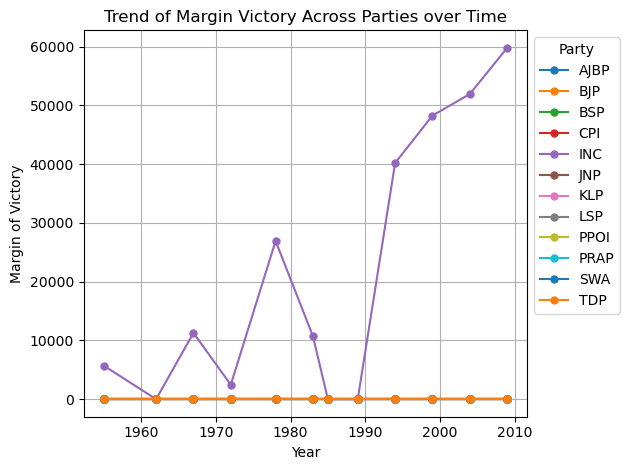

In [13]:
df = pd.read_excel("assembly_dataset4.xlsx")

df['PARTY'] = df['PARTY'].replace('IND', 'INC')

#Filter data for Andhra Pradesh and NARASANNAPETA constituency
df_filtered = df[(df['ST_NAME'] == 'Andhra Pradesh') & (df['AC_NAME'] == 'NARASANNAPETA')]

#Group by party and sum the votes to find total votes for each party
party_votes = df_filtered.groupby('PARTY')['VOTES'].sum().reset_index()

#Define threshold for major parties (adjust as needed)
threshold = party_votes['VOTES'].quantile(0.9)

#Filter major parties
major_parties = party_votes[party_votes['VOTES'] >= threshold]['PARTY']

#Filter data for major parties
df_major_parties = df_filtered[df_filtered['PARTY'].isin(major_parties)]

#Group by year and party and calculate the margin of victory
margin_df = df_filtered.groupby(['YEAR', 'PARTY']).apply(lambda x: x['VOTES'].max() - x['VOTES'].min()).reset_index(name='Margin')

#Pivot the data for plotting
pivot_df = margin_df.pivot(index='YEAR', columns='PARTY', values='Margin').fillna(0)

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='line', marker='o', markersize=5)
plt.title('Trend of Margin Victory Across Parties over Time')
plt.xlabel('Year')
plt.ylabel('Margin of Victory')
plt.grid(True)
plt.legend(title='Party', bbox_to_anchor=(1, 1))
plt.tight_layout()

#Save the plot
plt.savefig('margin_of_victory_trend.png')

plt.show()

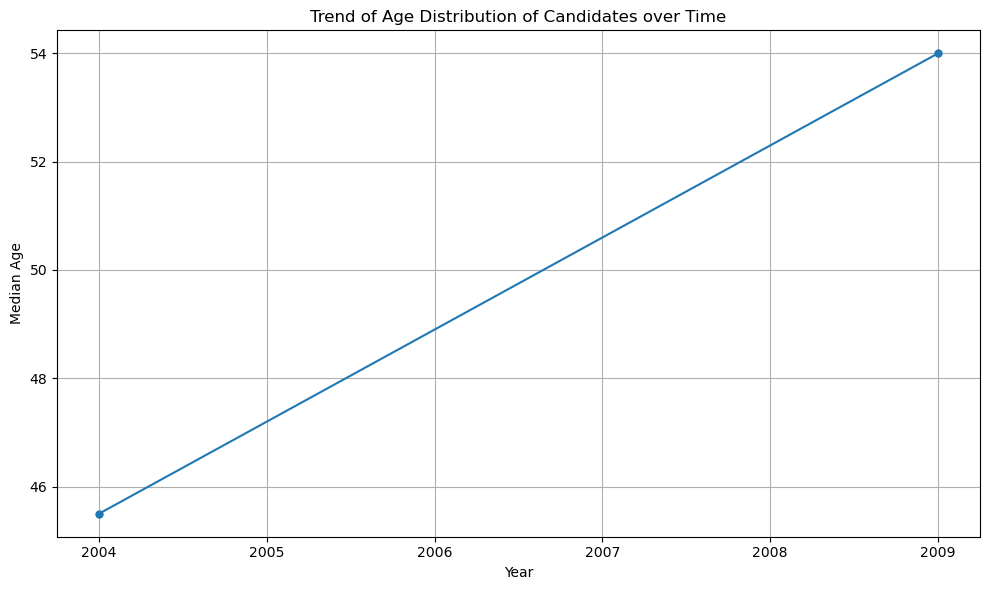

In [15]:
age_distribution = df_filtered.groupby('YEAR')['AGE'].median()

#PLot the trend
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='line', marker='o', markersize=5)
plt.title('Trend of Age Distribution of Candidates over Time')
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.grid(True)
plt.tight_layout()

#Save the plot
plt.savefig('age_distribution_over_time.png')

#Show the plot
plt.show()
